In [25]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("../_data/2020-report/electricity_reliability_2020.csv").set_index(['Utility Number']).sort_index()
df

,Data Year,Utility Name,State,Ownership,Short Form,SAIDI With MED,SAIFI With MED,CAIDI With MED,SAIDI Without MED,SAIFI Without MED,CAIDI Without MED,SAIDI With MED Minus LOS,SAIFI With MED Minus LOS,CAIDI Minus MED,Number of Customers,Highest Dist. Voltage,Outages Recorded Automatically
Utility Number,,,,,,,,,,,,,,,,,
84,2019,A & N Electric Coop,MD,Cooperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2019,A & N Electric Coop,VA,Cooperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2019,Adams Electric Coop,IL,Cooperative,NaN,169.740,1.290,131.58140,169.740,1.290,131.58140,110.900,0.409,271.14914,8665.0,12.5,Y
108,2019,Adams-Columbia Electric Coop,WI,Cooperative,NaN,139.900,0.950,147.26316,139.900,0.950,147.26316,129.300,0.871,148.45006,37405.0,12.0,Y
155,2019,Agralite Electric Coop,MN,Cooperative,NaN,130.931,1.202,108.92762,128.759,1.181,109.02540,113.066,0.913,123.84009,5367.0,12.4,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58124,2019,City of Winter Park - (FL),FL,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59013,2019,PUD No 1 of Jefferson County,WA,Political Subdivision,NaN,291.000,2.040,142.64706,291.000,2.040,142.64706,NaN,NaN,NaN,19689.0,12.5,Y
60482,2019,CKenergy Electric Cooperative,OK,Cooperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
state_groups = df.groupby(by=['State'])

State
AK     8
AL    23
AR    19
AZ    12
CA    31
CO    24
CT     6
DC     1
DE     4
FL    39
GA    32
HI     4
IA    41
ID     8
IL    26
IN    42
KS    27
KY    33
LA    15
MA    24
MD     9
ME     3
MI    29
MN    78
MO    48
MS    20
MT    14
NC    51
ND    11
NE    21
NH     4
NJ     4
NM    16
NV     4
NY    14
OH    48
OK    34
OR    22
PA    15
RI     1
SC    31
SD    19
TN    52
TX    71
UT    15
VA    22
VT    13
WA    33
WI    42
WV     7
WY    14
Name: Data Year, dtype: int64

In [49]:
averages_df = round(state_groups.mean(),3)
averages_df.head()

,Data Year,SAIDI With MED,SAIFI With MED,CAIDI With MED,SAIDI Without MED,SAIFI Without MED,CAIDI Without MED,SAIDI With MED Minus LOS,SAIFI With MED Minus LOS,CAIDI Minus MED,Number of Customers,Highest Dist. Voltage
State,,,,,,,,,,,,
AK,2019,296.522,2.104,143.879,155.327,1.515,120.209,297.324,1.407,185.228,45563.667,26.500
AL,2019,238.991,2.007,102.340,157.585,1.622,103.525,197.003,1.604,117.172,33180.222,19.906
AR,2019,292.467,1.623,157.469,121.644,1.059,101.391,200.420,1.293,126.648,87640.400,23.960
AZ,2019,151.042,1.376,96.128,55.596,0.734,120.207,93.911,1.043,88.553,284228.155,33.330
CA,2019,261.290,1.413,164.311,119.754,1.128,108.570,238.807,1.068,237.906,702579.143,18.714


In [50]:
qb_df = averages_df[['SAIDI Without MED','SAIFI Without MED']]
qb_df['Number of Providers'] = state_groups.count()['Data Year']
qb_df

C:\Users\PaulB\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SAIDI Without MED,SAIFI Without MED,Number of Providers
State,,,
AK,155.327,1.515,8
AL,157.585,1.622,23
AR,121.644,1.059,19
AZ,55.596,0.734,12
CA,119.754,1.128,31
CO,83.150,0.903,24
CT,147.550,1.126,6
DC,55.000,0.490,1
DE,57.467,0.729,4


In [47]:
qb_df.to_csv("../_data/2020-report/electricity_upload.csv")

In [51]:
correlation = np.corrcoef(qb_df['SAIDI Without MED'],qb_df['SAIFI Without MED'])

In [52]:
correlation

array([[1.        , 0.76204288],
       [0.76204288, 1.        ]])

In [53]:
import matplotlib.pyplot as plt

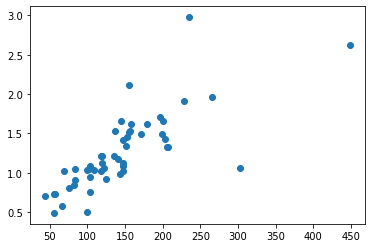

In [55]:
plt.scatter(qb_df['SAIDI Without MED'],qb_df['SAIFI Without MED'])